<a href="https://colab.research.google.com/github/Sriram4207/Elevatelabs-task8/blob/main/Task_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

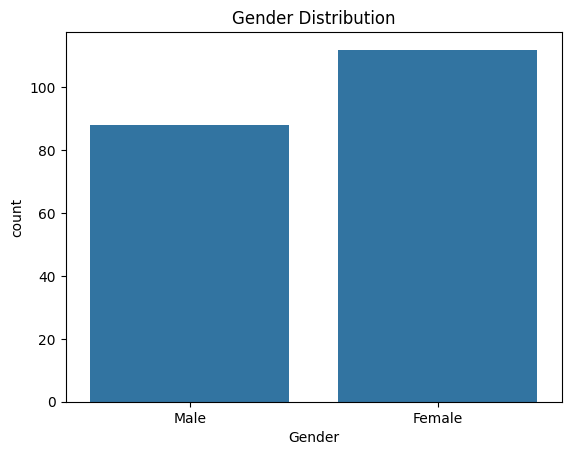

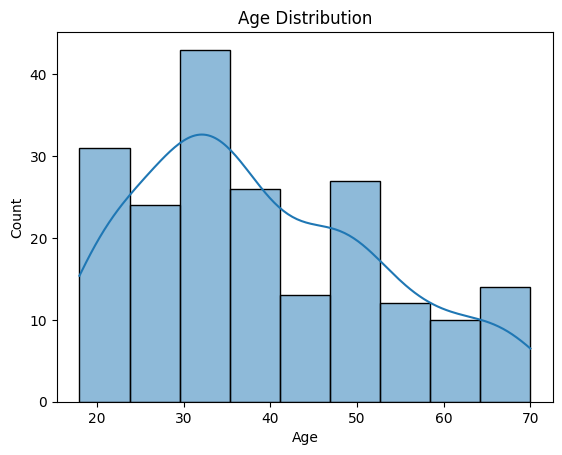

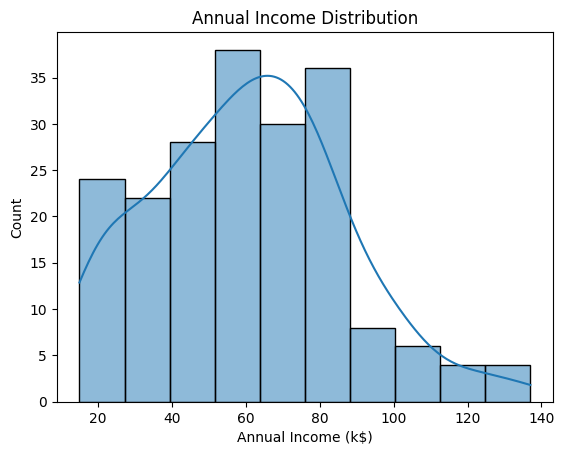

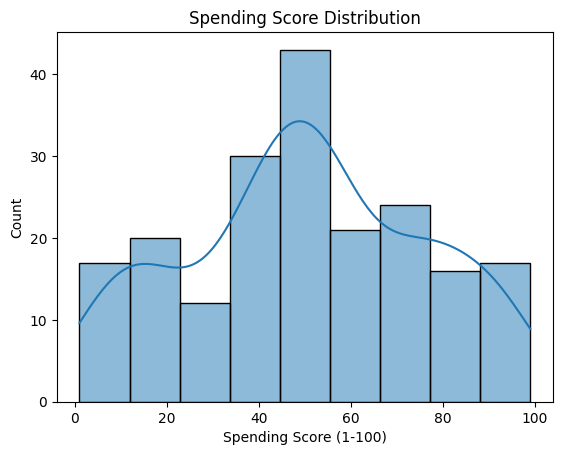

K-Means Silhouette Score: 0.5546571631111091


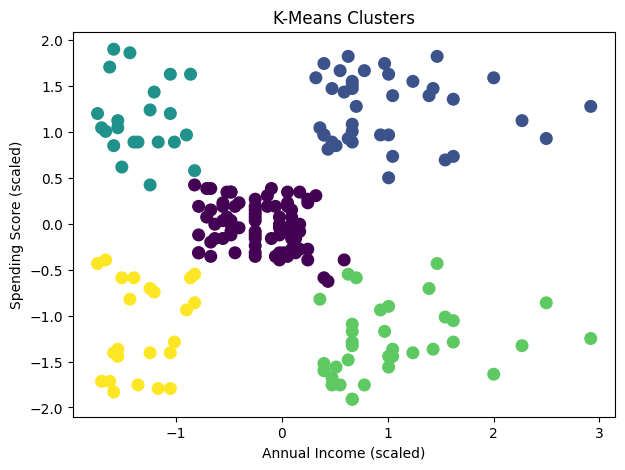

DBSCAN Silhouette Score: 0.5031438295828949


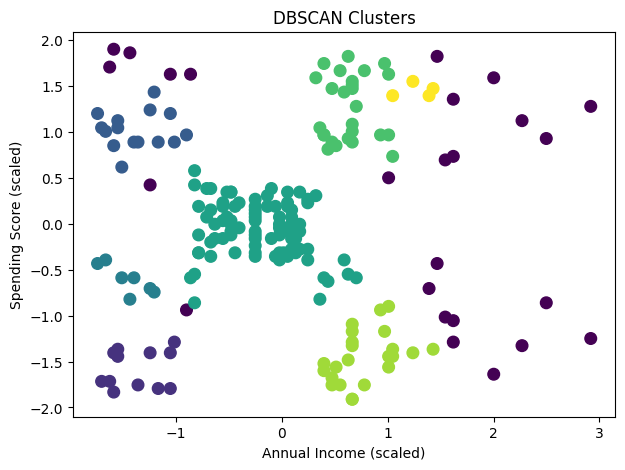

Task Completed: K-Means & DBSCAN both executed successfully!


In [22]:
# 🔹 Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 🔹 Step 2: Load dataset from URL
url = "https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv"
df = pd.read_csv(url)

# 🔹 Step 3: Handle missing values using mean, median, and mode
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Annual Income (k$)'] = df['Annual Income (k$)'].fillna(df['Annual Income (k$)'].median())
df['Genre'] = df['Genre'].fillna(df['Genre'].mode()[0])

# 🔹 Step 4: Perform EDA visualizations
sns.countplot(data=df, x='Genre'); plt.title("Gender Distribution"); plt.xlabel("Gender"); plt.show()
sns.histplot(df['Age'], kde=True); plt.title("Age Distribution"); plt.show()
sns.histplot(df['Annual Income (k$)'], kde=True); plt.title("Annual Income Distribution"); plt.show()
sns.histplot(df['Spending Score (1-100)'], kde=True); plt.title("Spending Score Distribution"); plt.show()

# 🔹 Step 5: Select required features and scale them
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 Step 6: Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto') # Added n_init='auto' to suppress warning
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)
kmeans_score = silhouette_score(X_scaled, df['KMeans_Cluster'])
print("K-Means Silhouette Score:", kmeans_score)

# 🔹 Step 7: Visualize K-Means clusters
plt.figure(figsize=(7,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=df['KMeans_Cluster'], s=70)
plt.title("K-Means Clusters")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()

# 🔹 Step 8: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.35, min_samples=6)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Filter out noise points (-1) before silhouette score
valid = df['DBSCAN_Cluster'] != -1
# Ensure there are enough valid points and clusters to calculate silhouette score
if len(np.unique(df['DBSCAN_Cluster'][valid])) > 1 and len(df['DBSCAN_Cluster'][valid]) > 1:
    dbscan_score = silhouette_score(X_scaled[valid], df['DBSCAN_Cluster'][valid])
    print("DBSCAN Silhouette Score:", dbscan_score)
else:
    print("DBSCAN Silhouette Score: Not enough non-noise points or clusters to calculate.")

# 🔹 Step 9: Visualize DBSCAN clusters
plt.figure(figsize=(7,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=df['DBSCAN_Cluster'], s=70)
plt.title("DBSCAN Clusters")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()

print("Task Completed: K-Means & DBSCAN both executed successfully!")